# Seyed Mohammad Amin Atyabi - 830402014

# Linear Separability

**1**

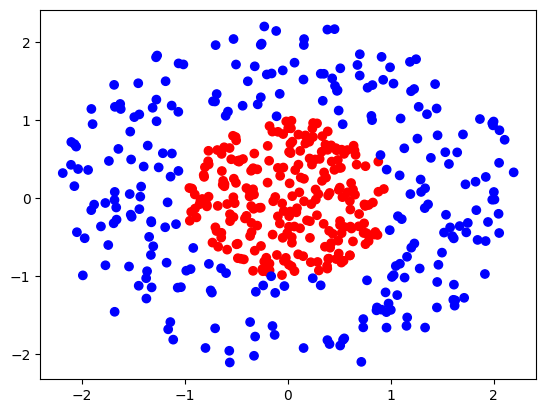

In [70]:
import numpy
from matplotlib import pyplot as plt


def random_point(radius, radius_start):
    alpha = 2 * numpy.pi * numpy.random.random()
    r = radius * numpy.sqrt(numpy.random.random() + (radius_start / 4))
    x = r * numpy.cos(alpha)
    y = r * numpy.sin(alpha)
    return x, y


color = {'r': 0.0, 'b': 1.0}

point_count = 250
X = []
Y = []
Z = []
for i in range(point_count):
    x, y = random_point(1, 0)
    X.append(x)
    Y.append(y)
    Z.append('r')

for i in range(point_count):
    x, y = random_point(2, 1)
    X.append(x)
    Y.append(y)
    Z.append('b')

data = numpy.array([X, Y])
Z = numpy.array(Z)

plt.scatter(data[0], data[1], color=Z)
plt.show()

**2**

Theta: [-0.00335808  0.09940434  0.17103227]
Accuracy: 0.53


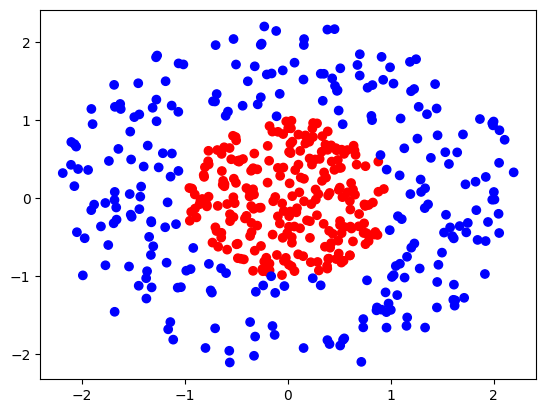

In [71]:
from sklearn.metrics import accuracy_score

label = Z.copy()
label[label == 'r'] = color['r']
label[label == 'b'] = color['b']
label = label.astype(float)


def sigmoid(x, theta):
    return 1 / (1 + numpy.exp(-numpy.dot(x, theta)))


def cost_function(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X, theta)
    loss = (-1 / m) * numpy.sum(y * numpy.log(h) + (1 - y) * numpy.log(1 - h))
    return loss


def gradient_descent(theta, X, y, learning_rate, iterations):
    m = X.shape[0]
    for _ in range(iterations):
        h = sigmoid(X, theta)
        error = h - y
        delta_theta = (1 / m) * numpy.dot(X.T, error)
        theta -= learning_rate * delta_theta
    return theta


theta = numpy.random.rand(3)

learning_rate = 0.01
num_iterations = 1000

data = numpy.array([numpy.full(shape=500, fill_value=1, dtype=int), data[0], data[1]]).transpose()

theta = gradient_descent(theta, data, label, learning_rate, num_iterations)
print(f'Theta: {theta}')

y_pred = numpy.round(sigmoid(data, theta))

accuracy = accuracy_score(label, y_pred)
print(f'Accuracy: {accuracy}')

plt.scatter(data.transpose()[1], data.transpose()[2], color=Z)

x = numpy.linspace(-2.0, 2.0, 1000)
y = numpy.linspace(-2.0, 2.0, 1000)
X, Y = numpy.meshgrid(x, y)
F = (theta[1] * (X ** 2)) + (theta[2] * (Y ** 2)) - theta[0]
plt.contour(X, Y, F, [0])
plt.show()

# Predict Car Price Using Linear Regression

**1**

In [87]:
import pandas

car_data = pandas.read_csv('data/car details v4.csv')

car_data['Engine'] = car_data['Engine'].str.replace(' cc', '')
car_data['Engine'] = pandas.to_numeric(car_data['Engine'], errors='coerce', downcast='integer')

car_data.describe()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1979.000000,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,1692.575543,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,643.736294,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,624.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,1197.000000,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,1498.000000,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,1995.000000,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,6592.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [74]:
car_data['price_cat'] = numpy.select(
    [car_data['Price'] >= 1925000,
     car_data['Price'] <= 490000,
     car_data['Price'].between(490000, 825000),
     car_data['Price'].between(825000, 1925000)],
    ['0', '1', '2', '3'],
    numpy.nan
)

car_data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,price_cat
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,2
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,1
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,1
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,2
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,...,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0,3
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,...,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0,1
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,...,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0,1
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,...,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0,0


In [75]:
from sklearn.model_selection import train_test_split

car_feature = car_data.drop(columns=['Price'])
car_price = car_data['Price']

x_train, y_train, x_test, y_test = train_test_split(car_feature, car_price, test_size=0.2, stratify=car_feature['price_cat'])

**2**

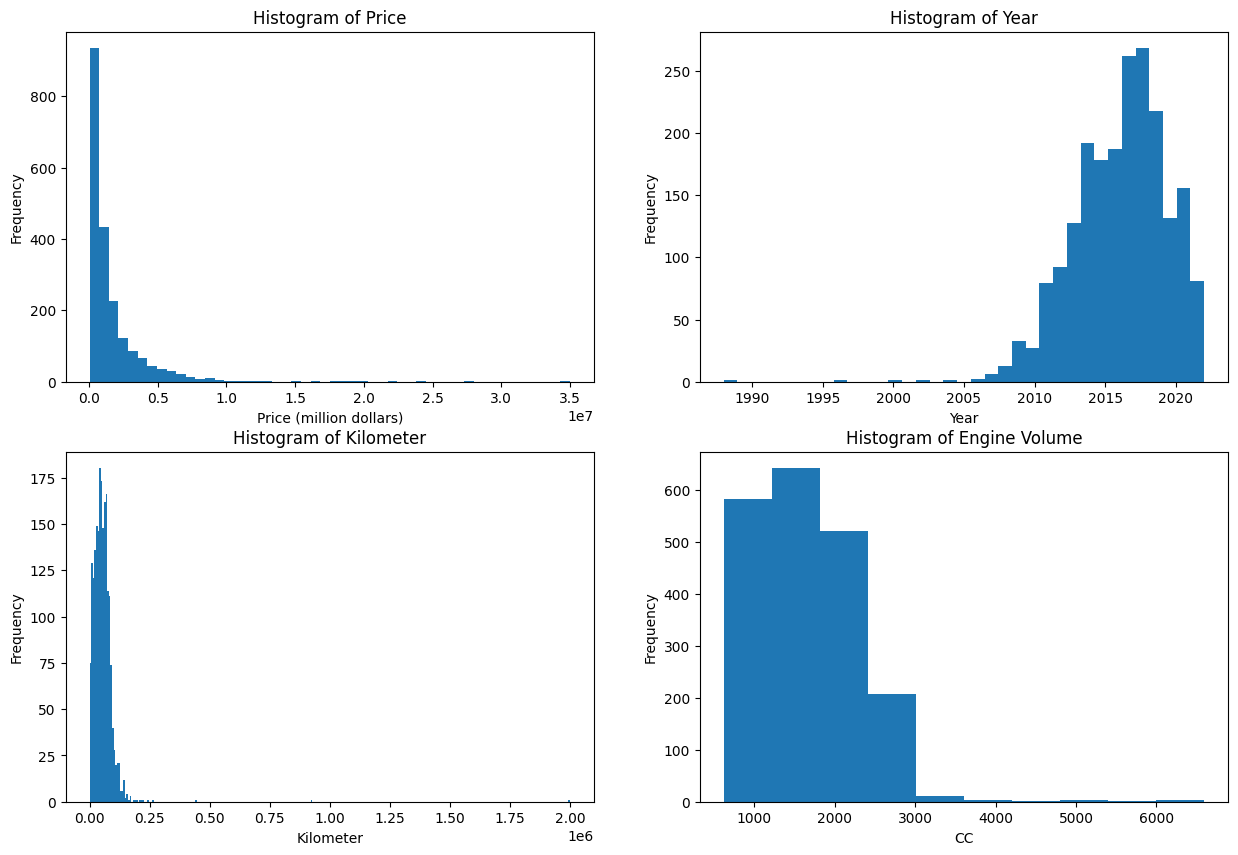

In [95]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(car_data['Price'], bins=50)
plt.title('Histogram of Price')
plt.xlabel('Price (million dollars)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(car_data['Year'], bins=35)
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(car_data['Kilometer'], bins=300)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(car_data['Engine'], bins=10)
plt.title('Histogram of Engine Volume')
plt.xlabel('CC')
plt.ylabel('Frequency')

plt.show()

**3**

**4**

**5**

**6**

**7**

**8**